<a href="https://colab.research.google.com/github/ThilinaJs/Ecommerce-Sentiment-Analyzer/blob/main/Ecommerce_Sentiment_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data PreProcessing & Exploration**

In [ ]:
import pandas as pd


# Load the data from csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/AmazonReviews.csv')

# Preview the data
df.head(10)

,review,sentiment
0,Fast shipping but this product is very cheaply...,Negative
1,This case takes so long to ship and it's not e...,Negative
2,Good for not droids. Not good for iPhones. You...,Negative
3,The cable was not compatible between my macboo...,Negative
4,The case is nice but did not have a glow light...,Negative
5,The cable keeps coming up with message that th...,Negative
6,This pos broke off in my phone after 3 uses an...,Negative
7,This product suck its hard 2 hear wat other ar...,Negative
8,Music cuts off within 30 secs. I like Aukey's ...,Negative
9,Yeah when they say mirror screen they mean it ...,Negative


In [ ]:
# Download all nltk packages
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

Data Exploration

In [ ]:
# Check the data shape (number of rows and columns)
print("Data shape:", df.shape)

Data shape: (25000, 2)


In [ ]:
# Count the number of missing values in df
missing_values_count = df.isnull().sum()
missing_values_count

review       1
sentiment    0
dtype: int64

In [ ]:
# count the number of duplicate reviews
duplicate_count = df.duplicated().sum()

# print the number of duplicate reviews
print(f'There are {duplicate_count} duplicate reviews.')

There are 228 duplicate reviews.


Data Preprocessing

In [ ]:
# remove the duplicates and keep the first occurrence
df.drop_duplicates(inplace=True)

# print the shape of the dataframe after removing duplicates
print(f'The dataframe has {df.shape[0]} rows after removing duplicates.')

The dataframe has 24772 rows after removing duplicates.


In [ ]:
# Lower Casing Reviews + Sentiment
df["review"] = df["review"].str.lower()
df["sentiment"] = df["sentiment"].str.lower()

# Removal of Punctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    return str(text)
df["review"] = df["review"].apply(remove_punctuation)

# Removal of stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df["review"] = df["review"].apply(lambda text: remove_stopwords(text))

# Removal of HTML Tags
import re
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df["review"] = df["review"].apply(lambda text: remove_html(text))

df.head()

,review,sentiment
0,fast shipping product cheaply made brought gra...,negative
1,case takes long ship even worth dont buy,negative
2,good droids good iphones cannot use features w...,negative
3,cable compatible macbook iphone also connector...,negative
4,case nice glow light im disappointed product d...,negative


In [ ]:
# Perform tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# perform tokenization
df['review'] = df['review'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment
0,"[fast, shipping, product, cheaply, made, broug...",negative
1,"[case, takes, long, ship, even, worth, dont, buy]",negative
2,"[good, droids, good, iphones, can, not, use, f...",negative
3,"[cable, compatible, macbook, iphone, also, con...",negative
4,"[case, nice, glow, light, im, disappointed, pr...",negative


In [ ]:
# Perform lemmatization
from nltk.stem import WordNetLemmatizer
# create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# perform lemmatization
df['review'] = df['review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

,review,sentiment
0,"[fast, shipping, product, cheaply, made, broug...",negative
1,"[case, take, long, ship, even, worth, dont, buy]",negative
2,"[good, droids, good, iphones, can, not, use, f...",negative
3,"[cable, compatible, macbook, iphone, also, con...",negative
4,"[case, nice, glow, light, im, disappointed, pr...",negative


In [ ]:
# Concatenate the words in each row
df['review'] = df['review'].apply(lambda x: ' '.join(x)) # Combine preprocessed lemmetized words

df.head()

,review,sentiment
0,fast shipping product cheaply made brought gra...,negative
1,case take long ship even worth dont buy,negative
2,good droids good iphones can not use feature w...,negative
3,cable compatible macbook iphone also connector...,negative
4,case nice glow light im disappointed product d...,negative


In [ ]:
# Check the target class balance
df["sentiment"].value_counts()

negative    14929
positive     9843
Name: sentiment, dtype: int64

Data Visualization

*Bar chart*

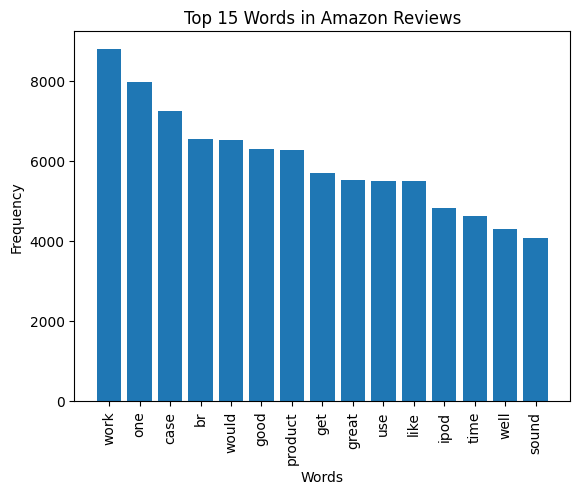

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
# Concatenate all reviews into a single string
reviews = ' '.join(df['review'].tolist())

# Split the reviews into individual words
words = reviews.split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the 15 most common words and their frequencies
top_words = word_counts.most_common(15)
top_words = dict(top_words)

# Create a bar chart of the top 15 words and their frequencies
plt.bar(top_words.keys(), top_words.values())

# Add labels and title to the plot
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Words in Amazon Reviews')
plt.xticks(rotation=90)
# Show the plot
plt.show()

*Heat Map*

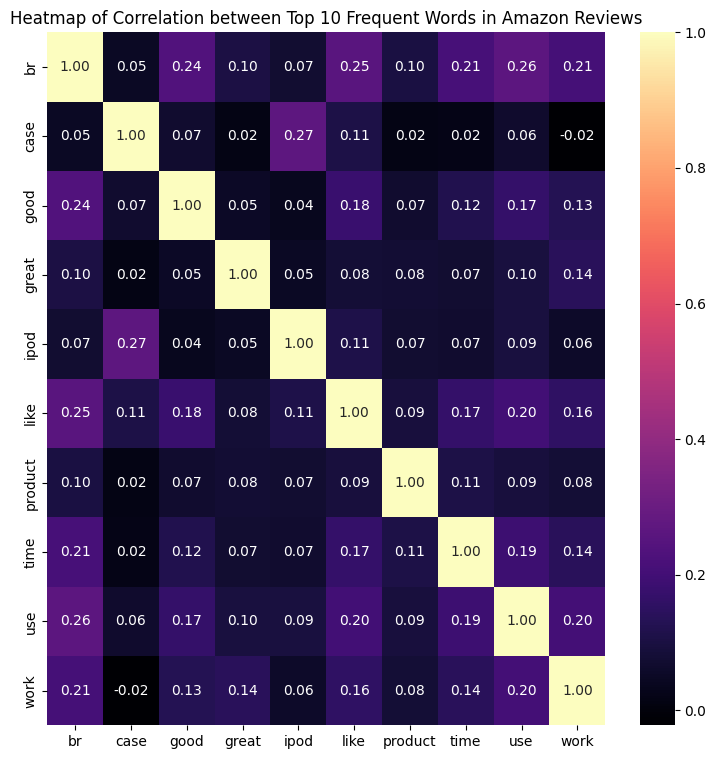

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object to extract the frequency of each word
cv = CountVectorizer(stop_words='english', max_features=10)

# Fit and transform the Amazon reviews into a matrix of word counts for the top 10 frequent words
word_count_matrix = cv.fit_transform(df['review'])

# Get the top 10 frequent words
columns = [word for (word, idx) in sorted(cv.vocabulary_.items(), key=lambda x: x[1])]

# Create a DataFrame of the word count matrix with the reviews as rows and the top 10 frequent words as columns
word_count_df = pd.DataFrame(word_count_matrix.toarray(), index=df.index, columns=columns)

# Compute the correlation matrix of the word count matrix
corr_matrix = word_count_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, cmap='magma', annot=True, fmt=".2f")
plt.title('Heatmap of Correlation between Top 10 Frequent Words in Amazon Reviews')
plt.show()

# **2. Model Deployment**

In [ ]:
# Install the required package
!pip install bert-for-tf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30531 sha256=722e7c4c65a981043fd40e9ba22630b4ac223689247a4a6fd02dcccc1262a228
  Stored in directory: /root/.cache/pip/wheels/d8/da/50/126d7b8416d9a0e6bf876935c2219a71e72a6529c25e150c56
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19471 sha256=fb6ec61bfb33fbd9f724c7dcded7b2f1e6e7cc94da195f448404a4df0043f6e8
  Stored in directory: /root/.cache/pip/wheels/97/a8/d0/f7419404174976a2686bb98b5c30df01cc71445415f32db9e6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7910 sha256=9789b1d8bd34b5e46750a0860df7d4130ff25fd195171338ec0a80b83d9e4d1c
  Sto

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import modules
import os
import bert
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hubd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tqdm import tqdm
import matplotlib.pyplot as plt

print("TensorFlow Version:",tf.__version__)
print("Hub version: ",hub.__version__)
pd.set_option('display.max_colwidth',1000)

TensorFlow Version: 2.12.0
Hub version:  0.13.0


Feature Engineering

In [ ]:
MAX_SEQ_LEN = 0
seq_len = []
for sent in df["review"]:
    if len(sent) > MAX_SEQ_LEN: MAX_SEQ_LEN = len(sent)
    seq_len.append(len(sent))
print(MAX_SEQ_LEN)
print(sum(seq_len)/len(df))

9067
224.06608267398676


In [ ]:
gs_folder_bert = "gs://cloud-tpu-checkpoints/bert/v3/uncased_L-12_H-768_A-12"
tf.io.gfile.listdir(gs_folder_bert)
tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file = os.path.join(gs_folder_bert, "vocab.txt"), do_lower_case=True)
print("Vocab size:", len(tokenizer.vocab))

# checkfunality of tokenizer
tokens = tokenizer.tokenize("Hello Tensor Flow!")
print(tokens)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)
print(tokenizer.convert_tokens_to_ids(['[CLS]', '[SEP]']))

Vocab size: 30522
['hello', 'tensor', 'flow', '!']
[7592, 23435, 4834, 999]
[101, 102]


In [ ]:
def create_tonkenizer(bert_layer):
    """Instantiate Tokenizer with vocab"""
    vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
    do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
    tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file, do_lower_case)
    print("Vocab size:", len(tokenizer.vocab))
    return tokenizer

In [ ]:
# Make Input Embeddings Suitable for BERT
def get_ids(tokens, tokenizer, MAX_SEQ_LEN):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (MAX_SEQ_LEN - len(token_ids))
    return input_ids

In [ ]:
def get_masks(tokens, MAX_SEQ_LEN):
    """Masks: 1 for real tokens and 0 for paddings"""
    return [1] * len(tokens) + [0] * (MAX_SEQ_LEN - len(tokens))

In [ ]:
def get_segments(tokens, MAX_SEQ_LEN):
    """Segments: 0 for the first sequence, 1 for the second"""
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (MAX_SEQ_LEN - len(tokens))

# checkfunality of get_masks
print(get_segments(tokenizer.tokenize("Hello TensorFlow!"), 500))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
def create_single_input(sentence, tokenizer, max_len):
    """Create an input from a sentence"""
    stokens = tokenizer.tokenize(sentence)
    stokens = stokens[:max_len] # max_len = MAX_SEQ_LEN - 2, why -2 ? ans: reserved for [CLS] & [SEP]
    stokens = ["[CLS]"] + stokens + ["[SEP]"]
    return get_ids(stokens, tokenizer, max_len+2), get_masks(stokens, max_len+2), get_segments(stokens, max_len+2)

In [ ]:
def convert_sentences_to_features(sentences, tokenizer, MAX_SEQ_LEN):
    """Convert sentences to features: input_ids, input_masks and input_segments"""
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences, position=0, leave=True):
      ids, masks, segments = create_single_input(sentence, tokenizer, MAX_SEQ_LEN-2) # why -2 ? ans: reserved for [CLS] & [SEP]

      input_ids.append(ids)
      input_masks.append(masks)
      input_segments.append(segments)
    return [np.asarray(input_ids, dtype=np.int32), np.asarray(input_masks, dtype=np.int32), np.asarray(input_segments, dtype=np.int32)]

Define Model Architecture

In [ ]:
def nlp_model(bert_base):
    # Load the pre-trained BERT base model
    bert_layer = hub.KerasLayer(handle=bert_base, trainable=True)
    # BERT layer three inputs: ids, masks and segments
    input_ids = Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name="input_ids")
    input_masks = Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name="input_masks")
    input_segments = Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name="segment_ids")

    inputs = [input_ids, input_masks, input_segments] # BERT inputs
    pooled_output, sequence_output = bert_layer(inputs) # BERT outputs

    x = Dense(units=768, activation='relu')(pooled_output) # hidden layer
    x = Dropout(0.15)(x)
    outputs = Dense(2, activation="softmax")(x) # output layer

    model = Model(inputs=inputs, outputs=outputs)
    return model

Setting hyper-parameters to the model

In [ ]:
# hyper-parameters
BATCH_SIZE = 10
EPOCHS = 1
MAX_SEQ_LEN = 500

# model construction (we construct model first inorder to use bert_layer's tokenizer)
bert_base = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1"
model = nlp_model(bert_base)
model.summary()

# Create dataframe for training and testing
df = df.sample(frac=1) # Shuffle the dataset
# we would like to use bert tokenizer; therefore, chech model.summary() and find the index of bert_layer
tokenizer = create_tonkenizer(model.layers[3])

# create training data and testing data
x_train = convert_sentences_to_features(df['review'][:1000], tokenizer, MAX_SEQ_LEN)
x_valid = convert_sentences_to_features(df['review'][1000:1500], tokenizer, MAX_SEQ_LEN)
x_test = convert_sentences_to_features(df['review'][1500:2000], tokenizer, MAX_SEQ_LEN)
df['sentiment'].replace('positive', 1., inplace=True)
df['sentiment'].replace('negative', 0., inplace=True)
one_hot_encoded = to_categorical(df['sentiment'].values)
y_train = one_hot_encoded[:1000]
y_valid = one_hot_encoded[1000:1500]
y_test =  one_hot_encoded[1500:2000]

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 500)]        0           []                               
                                                                                                  
 input_masks (InputLayer)       [(None, 500)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 500)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_ids[0][0]',              
                                 (None, 500, 768)]                'input_masks[0][0]',        

100%|██████████| 500/500 [00:00<00:00, 1756.32it/s]


# **3. Fine-tuning the model**

Fine tuning the model with preprocessed dataset

In [ ]:
# use adam optimizer to minimize the categorical_crossentropy loss
optimizer = Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# fine tune the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

# save the trained model
model.save('/content/drive/MyDrive/Colab Notebooks/bert_fine_tune.h5')

100/100 [==============================] - 8648s 86s/step - loss: 0.6150 - accuracy: 0.6740 - val_loss: 0.5080 - val_accuracy: 0.7720


# **4. Evaluation**

Evaluate the fine tuned model using the test dataset

In [ ]:
# load the pretrained nlp_model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/bert_fine_tune.h5', custom_objects={'KerasLayer': hub.KerasLayer})

# predict on test dataset
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(x_test), axis=1)


print(classification_report(np.argmax(y_test, axis=1), y_pred))

16/16 [==============================] - 1245s 78s/step
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       304
           1       0.67      0.78      0.72       196

    accuracy                           0.76       500
   macro avg       0.75      0.76      0.75       500
weighted avg       0.77      0.76      0.76       500



# **5. User Interface**

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=ae0716372c9a0ec13c0fa7ffd131bb77f9b4dcc2aedd3140b33703716643000d
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
!pip install bert-for-tf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30515 sha256=f4ce3950643224b7e23cb6b24e7fb933d16bb37740692e02e76efb5c0de80000
  Stored in directory: /root/.cache/pip/wheels/d8/da/50/126d7b8416d9a0e6bf876935c2219a71e72a6529c25e150c56
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19457 sha256=3d54f38b239d0877ac355d84a22b9a2038059de4d4aee2ae54ff3497015bc0d3
  Stored in directory: /root/.cache/pip/wheels/97/a8/d0/f7419404174976a2686bb98b5c30df01cc71445415f32db9e6
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7892 sha256=97a1d576b3ee55661e0f049c3eb276b685d8cf05f3479ca8a549cc658949df5b
  Sto

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%writefile app.py
# Import modules
import streamlit as st
import pandas as pd
import os
import bert
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tqdm import tqdm

gs_folder_bert = "gs://cloud-tpu-checkpoints/bert/v3/uncased_L-12_H-768_A-12"
tf.io.gfile.listdir(gs_folder_bert)
tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file = os.path.join(gs_folder_bert, "vocab.txt"), do_lower_case=True)

def create_tonkenizer(bert_layer):
    """Instantiate Tokenizer with vocab"""
    vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
    do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
    tokenizer = bert.bert_tokenization.FullTokenizer(vocab_file, do_lower_case)
    print("Vocab size:", len(tokenizer.vocab))
    return tokenizer

# Make Input Embeddings Suitable for BERT
def get_ids(tokens, tokenizer, MAX_SEQ_LEN):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (MAX_SEQ_LEN - len(token_ids))
    return input_ids

def get_masks(tokens, MAX_SEQ_LEN):
    """Masks: 1 for real tokens and 0 for paddings"""
    return [1] * len(tokens) + [0] * (MAX_SEQ_LEN - len(tokens))

def get_segments(tokens, MAX_SEQ_LEN):
    """Segments: 0 for the first sequence, 1 for the second"""
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (MAX_SEQ_LEN - len(tokens))

def create_single_input(sentence, tokenizer, max_len):
    """Create an input from a sentence"""
    stokens = tokenizer.tokenize(sentence)
    stokens = stokens[:max_len] # max_len = MAX_SEQ_LEN - 2, why -2 ? ans: reserved for [CLS] & [SEP]
    stokens = ["[CLS]"] + stokens + ["[SEP]"]
    return get_ids(stokens, tokenizer, max_len+2), get_masks(stokens, max_len+2), get_segments(stokens, max_len+2)

def convert_sentences_to_features(sentences, tokenizer, MAX_SEQ_LEN):
    """Convert sentences to features: input_ids, input_masks and input_segments"""
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences, position=0, leave=True):
      ids, masks, segments = create_single_input(sentence, tokenizer, MAX_SEQ_LEN-2) # why -2 ? ans: reserved for [CLS] & [SEP]

      input_ids.append(ids)
      input_masks.append(masks)
      input_segments.append(segments)
    return [np.asarray(input_ids, dtype=np.int32), np.asarray(input_masks, dtype=np.int32), np.asarray(input_segments, dtype=np.int32)]

import tensorflow_hub as hub
import tensorflow as tf

# Load the model - Fine Tuned
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Models/bert_fine_tune.h5', custom_objects={'KerasLayer': hub.KerasLayer})

tokenizer = create_tonkenizer(model.layers[3])

# --------------------------------Header-----------------------------------------

st.subheader("HP 15.6 inch Laptop, Intel Core i5-1135G7 Processor, 15.6 FHD Anti-Glare LED Display, HDMI, Wi-Fi and Bluetooth, Lightweight Design, Fast Charge, Windows 11 Home (16GB RAM | 1TB SSD)")

# ---------------------------------Image-----------------------------------------

from PIL import Image

image = Image.open('/content/drive/MyDrive/Colab Notebooks/Images/Laptop.jpg')

st.image(image, caption='Dell Inspiron 15')

# ---------------------------------Price------------------------------------------

st.subheader("Price :red[$500]")

# ------------------------------New Reviews---------------------------------------
global csv_path
csv_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Reviews.csv'
# create the text input widget with the unique key
input_text = st.text_input("Enter your review:")

if input_text:
  # Convert input to a feature list
  x_text = convert_sentences_to_features([input_text], tokenizer, 500)

  # Predict sentiment of the input
  y_pre = np.argmax(model.predict(x_text), axis=1)

  if y_pre[0] == 1:
    sntim = "Positive"
  else:
    sntim = "Negative"


  # read CSV file from Google Drive path
  df = pd.read_csv(csv_path)
  # append new review to the 'Customer Review'
  new_row = {'Customer Reviews': input_text, 'Sentiment': sntim}
  df = df.append(new_row, ignore_index=True)
  # save changes back to the original CSV file
  df.to_csv(csv_path, index=False)

csv_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Reviews.csv'
df = pd.read_csv(csv_path)

# View the tabel

st.table(df)


# ---------------------------Sentiment Percentage------------------------------------

# Count number of 'Positive' and 'Negative' reviews in the df
positive_count = len(df[df['Sentiment'] == 'Positive'])
negative_count = len(df[df['Sentiment'] == 'Negative'])

# Calculate percentages of 'Positive' and 'Negative' reviews
total_count = len(df['Sentiment'])
positive_percentage = positive_count / total_count * 100
negative_percentage = negative_count / total_count * 100

# Display card visualizations
#st.write(f"Number of 'Positive' Reviews: {positive_count}")
#st.write(f"Number of 'Negative' Reviews: {negative_count}")
#st.write("")

st.write(f"Percentage of 'Positive' Reviews: {positive_percentage:.2f}%")
st.progress(positive_percentage / 100)

st.write(f"Percentage of 'Negative' Reviews: {negative_percentage:.2f}%")
st.progress(negative_percentage / 100)

Overwriting app.py


Run the app using localtunnel

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0

npx: installed 22 in 13.521s
your url is: https://nine-apples-invite.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.94.157:8501

2023-05-12 15:08:56.695384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 15:08:58.860756: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-12 15:09:01.299952: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials fil